# Chapter 7: Initial Value Problems

Solve $\textbf{y}' = \textbf{F}(x, \textbf{y})$ with $\textbf{y}(a)=\alpha$

## Introduction

A *first-order* differential equation is written as:

$$
y' = f(x, y),
$$
where $y'=\frac{dy}{dx}$ and $f(x, y)$ is a given function.

The solution of this equation includes an arbitrary integration constant, which is given by the *auxiliary condition* specified at $x=a$:
$$
y(a) = \alpha
$$

### ODE of order n



#### Example 7.2 (first part)

Formulate the following initial value problem in the form $\textbf{y}'=\textbf{F}(x, \textbf{y})$:
$$
y'' = -0.1y'-x \quad ; \quad y(0) = 0 \quad y'(0) = 1
$$

#### Formulation

An **ordinary differential equation (ODE) of order $n$** is written as:
$$
y^{(n)} = f(x, y, y', y'', \ldots, y^{(n-1)})
$$
It can always be transformed into n first-order equations using:
$$
y_0 = y \quad ; \quad y_1 = y' \quad ; \quad y_2 = y'' \quad ; \quad \ldots \quad ; \quad y_{n-1} = y^{(n-1)}
$$
The equivalent first-order equations are:
$$
y_0' = y_1 \quad ; \quad y_1'=y_2 \quad ; \quad y_2'=y_3 \quad ; \quad \ldots \quad ; \quad y_n' = f(x, y_0, y_1, \ldots, y_{n-1}) 
$$

We now need $n$ auxilary conditions. If the conditions are specified at the same value of $x$, the problem is called an **initial value problem**:
$$
y_0(a) = \alpha_0 \quad ; \quad y_1(a) = \alpha_1 \quad ; \quad y_2(a) = \alpha_2 \quad ; \quad \ldots \quad ; \quad y_{n-1}(a) = \alpha_{n-1}
$$
Otherwise, the problem is called a *boundary value problem* (see next Chapter). 

An ODE of order $n$ is written as follows in vector form:
$$
\textbf{y}' = \textbf{F}(x, \textbf{y}) \quad ; \quad \textbf{y}(a) = \pmb{\alpha}
$$
where
$$
\textbf{F}(x, \textbf{y}) = \begin{bmatrix}
y_1 \\
y_2 \\
\ldots \\
f(x, \textbf{y})
\end{bmatrix}
$$

## Euler's Method

This method is based on the truncated Taylor series of $\textbf{y}$ about x:
$$
\textbf{y}(x+h) \approx \textbf{y}(x) + \textbf{y}'(x)h \quad (\textbf{1})
$$
which gives:
$$
\textbf{y}(x+h) \approx \textbf{y}(x) + \textbf{F}(x, \textbf{y})h
$$

This equation can be used to compute $\textbf{y}$ **incrementally** from $x=a$ to any $x$ by steps of $h$.

### Illustration

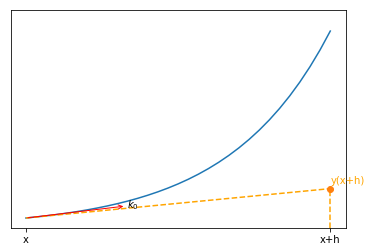

In [137]:
from matplotlib import pyplot as plt
from numpy import arange, exp
x = arange(0, 3.1, 0.1)
plt.plot(x, exp(x))
plt.annotate(s='$k_0$', xy=(0, 1), xytext=(1, 2), arrowprops=dict(arrowstyle='<-', color='red'))
plt.plot([0, 3], [1, 4], '--', color='orange')
plt.plot([3, 3], [0, 4], '--', color='orange')
plt.annotate("y(x+h)", xy=(3, 4.5), color='orange')
plt.plot([3], [4], 'o')
plt.xticks([0, 3], ["x", "x+h"])
plt.yticks([])
plt.ylim(0, exp(3.1))
plt.show()

### Implementation

In [33]:
from numpy import array
def euler(F, x0, y0, x, h):
    '''
    Return y(x) given the following initial value problem:
    y' = F(x, y)
    y(x0) = y0 # initial conditions
    h is the increment of x used in integration
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = [] # will store the value of x0 at each iteration
    Y = [] # will store the value of y0 at each iteration
    while x0 < x:
        h = min(h, x-x0)
        y0 = y0 + h*F(x0, y0)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return array(X), array(Y)

### Example 7.1

Integrate the initial value problem:
$$
y' + 4y = x^2 \quad y(0) = 1
$$
in steps of $h=0.01$ from $x=0$ to $0.03$. 

Determine the error knowing that the analytical solution is:
$$
y = \frac{31}{32}e^{-4x}+\frac{1}{4}x^2-\frac{1}{8}x+\frac{1}{32}
$$

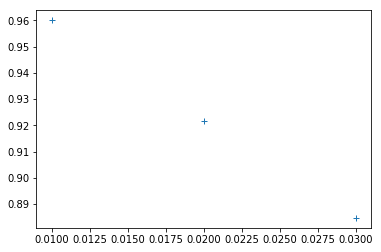

In [314]:
def F(x, y):
    return x**2 - 4*y

X, Y = euler(F, 0, 1, 0.03, 0.01)
from matplotlib import pyplot as plt
plt.plot(X, Y, '+')
plt.show()

### Example 7.2

Integrate the initial value problem:
$$
y'' = -0.1y'-x \quad y(0) = 0 \quad y'(0) = 1
$$
from $x=0$ to $2$ using $h=0.05$. Plot the computed $y$ with the analytical solution:
$$
y = 100x-5x^2+990(e^{-0.1x}-1)
$$

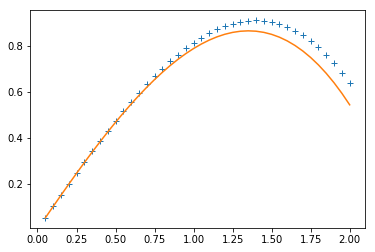

In [315]:
from numpy import array, exp
def F(x, y):
    return array([
                    y[1],
                    -0.1*y[1]-x
                ])

X, Y = euler(F, 0, array([0, 1]), 2, 0.05)
from matplotlib import pyplot as plt
plt.plot(X, Y[:,0], '+',
         X, 100*X-5*X**2+990*(exp(-0.1*X)-1))
plt.show()

### Error Analysis

The truncation error $\textbf{E}$ in equation $(\textbf{1})$ is proportional to $\textbf{y}''$, which explains the plot above.

The number of iterations in Euler's method is $n=\frac{x-x_0}{h}$.

$\Rightarrow$ Accumulated error $\textbf{E}_{acc}=\frac{x-x_0}{h}\textbf{E}=\mathcal{O}(h)$.

## Second-Order Runge-Kutta Method

The second-order Runge-Kutta method is obtained by the following iteration:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}\left(x+\frac{h}{2}\right)\right]
$$
where:
$$
\textbf{y}\left(x+\frac{h}{2}\right) = \textbf{y}(x) + \frac{h}{2}\textbf{F}(x, \textbf{y})
$$
It gives:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h\textbf{F}\left[x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{F}(x, \textbf{y})\right]
$$


The following notations are often used:

* $\textbf{k}_0 = \textbf{F}(x, \textbf{y})$: derivative of $\textbf{y}'$ at $x$.
* $\textbf{k}_1 = \textbf{F}\left(x+\frac{h}{2}, \textbf{y}+\frac{h}{2}\textbf{k}_0\right)$: derivative of $\textbf{y}'$ at $x+\frac{h}{2}$, where $\textbf{y}\left(x+\frac{h}{2}\right)$ is estimated from $\textbf{y}(x)$ using a linear extrapolation of slope $\textbf{k}_0$.
* $\textbf{y}(x+h) = y(x) + h\textbf{k}_1$

### Illustration

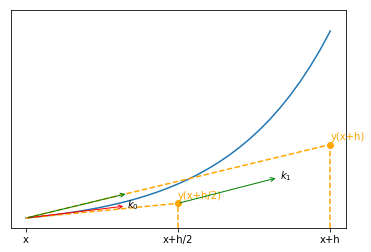

In [229]:
from matplotlib import pyplot as plt
from numpy import arange, exp
x = arange(0, 3.1, 0.1)
plt.plot(x, exp(x))

x0 = 0
h = 3
y = exp(0)
k = y
plt.annotate(s='$k_0$', xy=(x0, y), xytext=(x0+1, y + k), arrowprops=dict(arrowstyle='<-', color='red'))
plt.plot([x0, x0+h/2], [y, y + h/2*k], '--', color='orange')
plt.plot([h/2, h/2], [0, y + h/2*k], '--', color='orange')
plt.plot([h/2], [y + h/2*k], 'o', color='orange')
plt.annotate("y(x+h/2)", xy=(h/2, y + h/2*k+0.5), color='orange')

x0 = x0+h/2
y = y + h/2*k
k = y
plt.annotate(s='$k_1$', xy=(x0, y), xytext=(x0+1, y + k), arrowprops=dict(arrowstyle='<-', color='green'))
plt.plot([0, h], [exp(0), exp(0) + h*k], '--', color='orange')
plt.plot([h, h], [0, exp(0) + h*k], '--', color='orange')
plt.plot([h], [exp(0) + h*k], 'o', color='orange')
plt.annotate("y(x+h)", xy=(h, exp(0) + h*k + 0.5), color='orange')
plt.annotate(s='', xy=(0, exp(0)), xytext=(1, exp(0) + k), arrowprops=dict(arrowstyle='<-', color='green'))

plt.xticks([0, 1.5, 3], ["x", "x+h/2", "x+h"])
plt.yticks([])
plt.ylim(0, exp(3.1))
plt.show()

### Notes
* The textbook uses $\textbf{K}_i$, with $\textbf{K}_i=h\textbf{k}_i$
* Other Runge-Kutta integration methods exist, where $k_1$ is not taken at $\frac{h}{2}$, and $\textbf{y}(x+h)$ involves a linear combination of $k_0$ and $k_1$. The one presented here is called the *modified Euler's method*. No second-order Runge-Kutta formula has superiority over the other ones.

### Implementation

In [316]:
from numpy import array
def runge_kutta_2(F, x0, y0, x, h):
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2, y0 + h/2*k0)
        y0 = y0 + h*k1
        x0 += h
        X.append(x0)
        Y.append(y0)
    return array(X), array(Y)

### Illustration on example 7.2

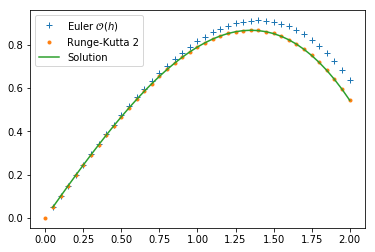

In [317]:
from numpy import array, exp

def F(x, y):
    return array([
                    y[1],
                    -0.1*y[1]-x
                ])

X, Y = euler(F, 0, array([0, 1]), 2, 0.05)
X1, Y1 = runge_kutta_2(F, 0, array([0, 1]), 2, 0.05)
from matplotlib import pyplot as plt
plt.plot(X, Y[:,0], '+',
         X1, Y1[:,0], '.',
         X, 100*X-5*X**2+990*(exp(-0.1*X)-1))
plt.legend(['Euler $\mathcal{O}(h)$',
           'Runge-Kutta 2',
           'Solution'])
plt.show()

### Example 7.3

## Fourth-order Runge-Kutta method



As in the second-order expression, $\textbf{y}(x+h)$ is estimated from a linear extrapolation of $\textbf{y}(x+h)$:
$$
\textbf{y}(x+h) = \textbf{y}(x) + h \frac{1}{6}\left(\textbf{k}_0 + 2\textbf{k}_1 + 2\textbf{k}_2 + \textbf{k}_3\right)
$$

The main difference with the second-order expression is that the slope used in the linear extrapolation is now a weighted average of 4 slopes: 
* $\textbf{k}_1$ and $\textbf{k}_2$, are estimated at $x+\frac{h}{2}$,
* $\textbf{k}_0$ and $\textbf{k}_3$ are estimated at the boundaries, $x$ and $x+h$. 

### Expression of $\textbf{k}_i$:

For $i > 0$, $\textbf{k}_i$ is estimated as the derivative (image by $\textbf{F}$) of the linear extrapolation of $\textbf{y}$ using $\textbf{k}_{i-1}$. $\textbf{k}_0$ is given by $\textbf{F}(x, \textbf{y})$:
* $\textbf{k}_0$ = $\textbf{F}(x, \textbf{y})$
* $\textbf{k}_1$ = $\textbf{F}\left(x+\frac{h}{2}, \textbf{y} + \frac{h}{2}\textbf{k}_0\right)$
* $\textbf{k}_2$ = $\textbf{F}\left(x+\frac{h}{2}, \textbf{y} + \frac{h}{2}\textbf{k}_1\right)$
* $\textbf{k}_3$ = $\textbf{F}\left(x+h, \textbf{y} + h\textbf{k}_2\right)$

### Illustration

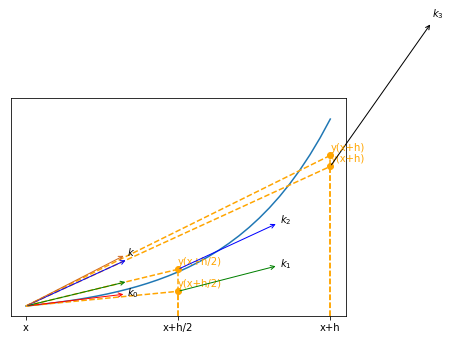

In [286]:
from matplotlib import pyplot as plt
from math import sqrt
from numpy import arange, exp
x = arange(0, 3.1, 0.1)
plt.plot(x, exp(x))

sumk = 0
# k0
x0 = 0
h = 3
y = exp(0)
k = y
sumk += k
step = 1 # so that the vector has a unit norm
plt.annotate(s='$k_0$', xy=(x0, y), xytext=(x0+step, y + step*k), arrowprops=dict(arrowstyle='<-', color='red'))
plt.plot([x0, x0+h/2], [y, y + h/2*k], '--', color='orange')
plt.plot([h/2, h/2], [0, y + h/2*k], '--', color='orange')
plt.plot([h/2], [y + h/2*k], 'o', color='orange')
plt.annotate("y(x+h/2)", xy=(h/2, y + h/2*k+0.5), color='orange')

# k1
x0 = x0+h/2
y = y + h/2*k
k = y
sumk += 2*k
step =  1
plt.annotate(s='$k_1$', xy=(x0, y), xytext=(x0+step, y + step*k), arrowprops=dict(arrowstyle='<-', color='green'))
plt.plot([0, h/2], [exp(0), exp(0) + h/2*k], '--', color='orange')
plt.plot([h/2, h/2], [0, exp(0) + h/2*k], '--', color='orange')
plt.plot([h/2], [exp(0) + h/2*k], 'o', color='orange')
plt.annotate("y(x+h/2)", xy=(h/2, exp(0) + h/2*k + 0.5), color='orange')
plt.annotate(s='', xy=(0, exp(0)), xytext=(step, exp(0) + step*k), arrowprops=dict(arrowstyle='<-', color='green'))

# k2
x0 = h/2
y = exp(0) + h/2*k
k = y
sumk += 2*k
step = 1
plt.annotate(s='$k_2$', xy=(x0, y), xytext=(x0+step, y + step*k), arrowprops=dict(arrowstyle='<-', color='blue'))
plt.plot([0, h], [exp(0), exp(0) + h*k], '--', color='orange')
plt.plot([h, h], [0, exp(0) + h*k], '--', color='orange')
plt.plot([h], [exp(0) + h*k], 'o', color='orange')
plt.annotate("y(x+h)", xy=(h, exp(0) + h*k + 0.5), color='orange')
plt.annotate(s='', xy=(0, exp(0)), xytext=(step, exp(0) + step*k), arrowprops=dict(arrowstyle='<-', color='blue'))

# k3
x0 = h
y = exp(0) + h*k
k = y
sumk += k
step = 1
plt.annotate(s='$k_3$', xy=(x0, y), xytext=(x0+step, y + step*k), arrowprops=dict(arrowstyle='<-', color='black'))

k=sumk/6
plt.annotate(s='$k$', xy=(0, exp(0)), xytext=(1, exp(0) + k), arrowprops=dict(arrowstyle='<-', color='chocolate'))
plt.plot([0, h], [exp(0), exp(0) + h*k], '--', color='orange')
plt.plot([h, h], [0, exp(0) + h*k], '--', color='orange')
plt.plot([h], [exp(0) + h*k], 'o', color='orange')
plt.annotate("y(x+h)", xy=(h, exp(0) + h*k + 0.5), color='orange')

plt.xticks([0, 1.5, 3], ["x", "x+h/2", "x+h"])
plt.yticks([])
plt.ylim(0, exp(3.1))
plt.show()

### Implementation

In [1]:
from numpy import array
def runge_kutta_4(F, x0, y0, x, h):
     '''
    Return y(x) given the following initial value problem:
    y' = F(x, y)
    y(x0) = y0 # initial conditions
    h is the increment of x used in integration
    F = [y'[0], y'[1], ..., y'[n-1]]
    y = [y[0], y[1], ..., y[n-1]]
    '''
    X = []
    Y = []
    X.append(x0)
    Y.append(y0)
    while x0 < x:
        k0 = F(x0, y0)
        k1 = F(x0+h/2.0, y0 + h/2.0*k0)
        k2 = F(x0 + h/2.0, y0 + h/2*k1)
        k3 = F(x0+h, y0+h*k2)
        y0 = y0 + h/6.0*(k0+2*k1+2.0*k2+k3)
        x0 += h
        X.append(x0)
        Y.append(y0)
    return array(X), array(Y)

### Illustration on example 7.2

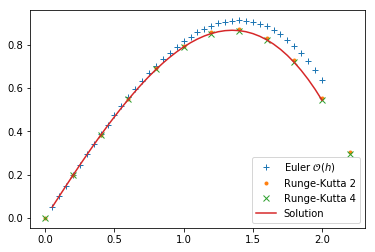

In [313]:
from numpy import array, exp
def F(x, y):
    return array([
                    y[1],
                    -0.1*y[1]-x
                ])
X, Y = euler(F, 0, array([0, 1]), 2, 0.05)
X1, Y1 = runge_kutta_2(F, 0, array([0, 1]), 2, 0.2)
X2, Y2 = runge_kutta_4(F, 0, array([0.0, 1.0]), 2.0, 0.2)
from matplotlib import pyplot as plt
plt.plot(X, Y[:,0], '+',
         X1, Y1[:,0], '.',
         X2, Y2[:,0], 'x',
         X, 100.0*X-5.0*X**2+990.0*(exp(-0.1*X)-1.0))
plt.legend(['Euler $\mathcal{O}(h)$',
           'Runge-Kutta 2',
            'Runge-Kutta 4',
           'Solution'])
plt.show()

### Example 7.6

In [28]:
# CONSTANTS
G = 6.672*10**(-11) # m3 kg-1 s-2
M = 5.9742*10**(24) # kg
R = 6378.14*1000 # m
H = 772000 # m
v0 = 6700 # m/s


In [29]:
# Problem definition
from numpy import array
def F(x, y):
    return array([
        y[1],
        y[0]*y[3]**2-G*M/y[0]**2,
        y[3],
        -2*y[1]*y[3]/y[0]
    ])
y0 = array([
    R+H,
    0,
    0,
    v0/(R+H)
])

In [ ]:
# Resolution
X, Y = runge_kutta_4(F, 0, y0, 1500, 30)
from matplotlib import pyplot as plt
plt.plot(X, Y[:,0]-R)
plt.legend(["Distance to Earth"])
plt.show()

In [ ]:
# Value of t and theta when spacecraft hits Earth
for i in range(len(X)):
    if Y[i,0] - R < 0:
        print("t={} s".format((X[i-1]+X[i])/2))
        break
print("theta={} rad".format((Y[i-1, 2]+Y[i,2])/2))


## Stability and Stiffness

### Stability

A method is stable if errors do not accumulate catastrophically. A method is unstable if the solution grows very large when the solution does not.

Stability is determined by 3 factors:
1. The differential equations
2. The method of solution
3. $h$

There is no way to determine the stability beforehand, unless the differential equation is linear.

#### Stability of Euler's method

Let's consider the following linear problem:
$$
y' = -\lambda y \quad y(0) = \beta
$$
The analytical solution of this problem is $y(x)=\beta e^{-\lambda x}$

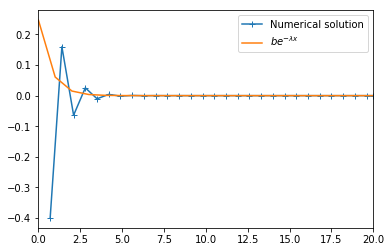

In [42]:
### Illustration

lam = 2
beta = 1
h = 0.7
xmax = 20

def F(x, y):
    return -lam*y

X, Y = euler(F, 0, beta, xmax, h)
from matplotlib import pyplot as plt
from numpy import exp
plt.plot(X, Y, '-+', beta*exp(-lam*X))
plt.legend(['Numerical solution', '$be^{-\lambda x}$'])
plt.xlim(0, xmax)
plt.show()

It can be shown that the solution is stable iif $h \leq \frac{2}{\lambda}$.

This result can be extended to a system of $n$ differential equations of the form:
$$
\textbf{y}' = - \pmb{\Lambda} \textbf{y}
$$
where $\pmb{\Lambda}$ is a constant matrix with positive eigenvalues $\lambda_i$. It can be shown that Euler's method of integration is stable if:
$$
h < \frac{2}{\lambda_{\mathrm{max}}}
$$
where $\lambda_{\mathrm{max}}$ is the largest eigenvalue of $\pmb{\Lambda}$.

### Stiffness

A problem is called *stiff* when some terms in the solution vector $\textbf{y}(x)$ vary much more rapidly with x than others. 

Stiffness can be predicted for the equations:
$$
\textbf{y}' = - \pmb{\Lambda} \textbf{y}
$$
As their solution is:
$$
\textbf{y}(x) = \sum_iC_i\textbf{v}_iexp(-\lambda_ix)
$$
where $\lambda_i$ are the eigenvalues of $\pmb{\Lambda}$ and $\textbf{v}_i$ are the corresponding eigenvectors.

**The problem is stiff when there is a large disparity in the eigenvalues**.

#### Example

Consider the following differential equation:
$$
y'' + 1001 y' + 1000 y = 0
$$

We can rewrite it as:
$$
\textbf{y}' = - \pmb{\Lambda} \textbf{y}
$$
where:
$$
\textbf{y} = \begin{bmatrix}
y_0 = y\\
y_1 = y'
\end{bmatrix}
\quad
;
\quad
\pmb{\Lambda} = \begin{bmatrix}
0 & -1 \\
1000 & 1001
\end{bmatrix}
$$

The eigenvalues of $\pmb{\Lambda}$ are $\lambda_1=1000$ and $\lambda_2=1$: the problem is clearly stiff.

We would need $h \leq \frac{2}{\lambda_1} = 0.002$ for the Euler's method to be stable. **This comes at a computational cost**.

**Adaptive methods** (not seen in class) adjust $h$ to improve stability without increasing the computational cost too much.

#### Example 7.7

In [44]:
# Problem definition
def F(x, y):
    return array([
        y[1],
        -19/4*y[0]-10*y[1]
    ])
y0 = array([-9, 0])

In [45]:
# Resolution (h=0.1)
X, Y = runge_kutta_4(F, 0, y0, 10, 0.1)

In [ ]:
Y[-1,0]

In [47]:
# Resolution (h=0.5)
X, Y = runge_kutta_4(F, 0, y0, 10, 0.5)
Y[-1,0]

2.7029882874296353e+20